# 7장 군집화 (clustering)

**clustering : 비슷한 데이터끼리 모아 군집을 만드는 비지도학습**

* 군집 방법이 이용되는 사례들

고객분류

데이터분석

차원 축소

이상치 탐지

준지도학습

이미지 검색 

이미지 분할

## 7.1 K-Means 알고리즘

**1) k-means 알고리즘의 절차**

    교재 409-410쪽의 설명을 잘 읽어보자.


    k-means 알고리즘의 장점과 단점도 이해하자.

**2) 사이킷런의 `KMeans` 클래스**

* `sklearn.cluster.KMeans()` : `fit(), transform()` 또는 `fit_transform()`  으로 **비지도학습** 수행.

     [Scikitlearn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

* 주요 파라미터 

    `n_clusters` : 군집의 수 지정(중요)
    
    `init` : 초기 중심점 설정 방식(기본은 가능한 한 서로 먼 점들을 선택하는 `k-means++`)
    
    `max_iter` : 최대 반복 계산 횟수 (기본값은 300회)
    

* 결과

    `labels_` : 각 데이터가 속한 중심점의 번호(label) (가장 중요)

    `cluster_centers_` : 각 군집의 중심점 좌표



**3) K-Means를 이용한 붓꽃 데이터 Clustering**

* 데이터 준비

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline

위의 셀에서 첫줄에 있는 `scale`은 우리가 2장(pp. 125-127)에서 공부한 `StandardScaler`와 마찬가지로 평균 0, 분산 1로 변수 데이터를 변환하는 역할을 한다.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.feature_names = [name[:-5] for name in iris.feature_names]
iris.feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [7]:
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


* k-means 실행

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

/Users/oiehhun/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

* 결과 확인

군집화는 비지도학습방법이지만 iris 데이터에는 품종을 나타내는 target 변수도 있으므로 군집 결과와 그 변수값을 비교해서 군집이 잘 되었는지 알아볼 수 있다. 150개 데이터가 어느 군집에 속하는지 `labels_`를 보면 알 수 있다.

In [9]:
print(kmeans.labels_)  #군집 번호

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
np.bincount(kmeans.labels_)

array([62, 50, 38])

In [11]:
iris.target  #원래 품종

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
np.bincount(iris.target)

array([50, 50, 50])

원래 target의 분포는 50:50:50이었지만 군집화 결과는 62:50:38이 되었다. 

여기서 원래 target 변수의 값 0, 1, 2와 군집의 번호 0, 1, 2는 서로 아무 관계도 없다. 군집은 분류(지도학습)가 아니다.

In [13]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_

In [14]:
irisDF

,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [15]:
iris_result = irisDF.groupby(['target','cluster']).count()
print(iris_result)

                sepal length  sepal width  petal length  petal width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36


`groupby`를 이용하여 원래 데이터의 target 변수값(`target`)과 군집 결과(`cluster`)가 일치하는지 알아본 결과 target=0인 붓꽃들은 50개 모두 1번 군집으로 묶인 반면 target 1에서는 2개, target 3에서는 50개 가운데 14개가 잘못된 것을 알 수 있다. 

세 군집의 중심점 좌표는 아래와 같다.

In [16]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

* 차원 축소 후 데이터시각화

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

In [18]:
iris.data.shape

(150, 4)

In [19]:
pca_transformed.shape  #차원 축소 결과

(150, 2)

PCA의 결과로 나온 `pca_transformed`에는 새로 찾은 두 개의 주성분 좌표에서 150개 데이터의 위치가 들어있다.

In [22]:
pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [19]:
irisDF['pca_x'] = pca_transformed[:,0]  #[행 , 열] -> [ : , 0] : 행은 전부다 열은 인덱스 0만
irisDF['pca_y'] = pca_transformed[:,1]  #[행 , 열] -> [ : , 1] : 행은 전부다 열은 인덱스 1만
irisDF.head(3)

,sepal length,sepal width,petal length,petal width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


교재 414쪽의 코드처럼 데이터프레임의 index 번호를 이용해서 산점도를 그려도 되고, 교재 6장(385-6쪽)의 코드처럼 `for`문을 이용해서 그려도 된다.

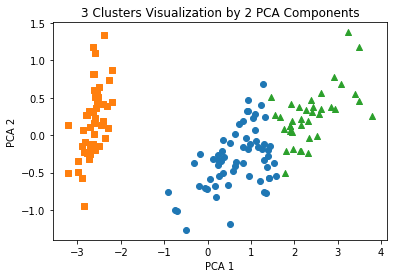

In [20]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index


plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o')  # p.69 명칭 기반으로 데이터를 추출
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

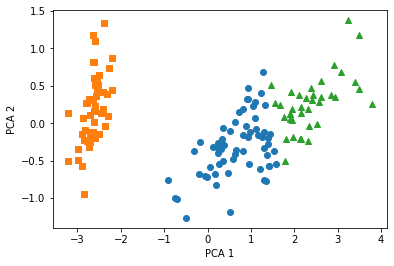

In [27]:
markers=['o', 's', '^']

for i, marker in enumerate(markers):  #반복문, enumerate : 리스트의 원소에 순서값을 부여해주는 함수.
    x_axis_data = irisDF[irisDF['cluster']==i]['pca_x']
    y_axis_data = irisDF[irisDF['cluster']==i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

cluster 1(사각형 마커)은 잘 분리되었지만 cluster 0(동그라미)과 2(삼각형)는 분리하기 어려워보인다.

**4) Clustering 알고리즘 테스트를 위한 데이터 생성** 

* `make_blobs`로 만든 인위적 데이터를 이용한 군집화 연습

`sklearn.datasets`에 포함되어 있는 `make_blobs()`를 이용하면 분류와 군집화 알고리즘을 연습하기 위해 사이킷런이 제공하는 인위적인 데이터를 만들 수 있다. 이 함수 이외에 `make_classification(), make_circle(), make_moon()`과 같은 함수를 이용해서 테스트 데이터를 만들 수도 있다.


`make_blobs()`의 형식은 다음과 같다.

    `from sklearn.datasets import make_blobs`

    `X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=2, random_state=4)`

`make_blobs()`의 괄호 속의 parameter들은 순서대로 만들 `데이터수, 피처 수, 군집의 수, 생성될 군집데이터의 표준편차, 그리고 random_state`를 나타낸다. 

`X`에는 feature data가 들어있고 `y`에는 분류를 위한 target data가 들어있으므로 clustering을 연습할 목적이라면 `y`는 필요없다.

In [21]:
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

In [22]:
print(X.shape, y.shape)

(200, 2) (200,)


아래의 넘파이 **`unique()`**함수는 변수에 있는 서로 다른 값과 각 값의 빈도를 보여준다. 200개로 된 `y` 변수에는 0, 1, 2값들이 고르게 들어있다.

In [30]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [23]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


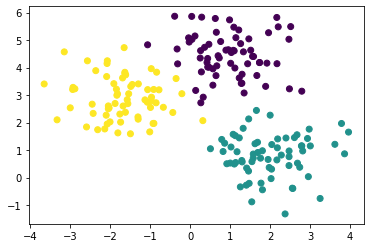

In [24]:
plt.scatter(clusterDF['ftr1'], clusterDF['ftr2'], c=clusterDF['target'])  #퀴즈
plt.show()

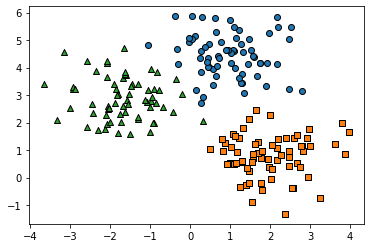

In [25]:
target_list = np.unique(y)
markers=['o', 's', '^', 'P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

In [26]:
target_list

array([0, 1, 2])

아래 코드에서는 `KMeans(n_clusters=3)`에 따라 3개의 군집으로 나누므로 200개의 `labels_`는 0,1,2 중에서 하나의 값이 된다.

**`kmeans.predict(X)`는 `labels_`와 같다.** clustering에서 `predict()`는 분류 모델을 만들고 나서 `predict()`로 test data의 예측값을 구하는 것과 다르므로 혼동하지 말자.

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

clusterDF['kmeans_label']  = cluster_labels
centers = kmeans.cluster_centers_

In [28]:
centers  #중심점이 3개(행별로 3개)

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

* 여기서 잠깐 PCA와 KMeans의 분석절차를 비교해보자. 앞서 우리는 iris 데이터를 분석하는 과정에서 4개인 feature 변수(`iris.data`)를 두 개의 주성분으로 만들었다.

```
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
```

    이때 `fit_transform(iris.data)`라는 코드가 필요했다(그 결과가 무엇이었나?). : 주성분 2개

    그런데 지금 200개의 blobs 데이터를 KMeans 방법으로 군집화하는 코드에는 `fit()`만 있고 `transform()`은 없다. 
    왜 그럴까? KMeans에는 데이터를 변환하는 `transform()`을 아예 쓸 수 없을까?

    그렇지 않다. 아래와 같이 역시 쓸 수 있다. 그렇다면 그 결과는 무엇일까?

In [29]:
X_new = kmeans.transform(X)  # X 데이터의 각 점과 군집 평균들까지의 거리
X_new[:5]

array([[2.80642077, 0.69457301, 4.60739377],
       [0.29270428, 2.83452075, 3.83144867],
       [0.19394941, 3.27033353, 3.89152913],
       [2.66019046, 0.52431929, 4.26940957],
       [0.94533811, 3.8044721 , 4.61464903]])

**각 데이터에 군집과의 거리를 나타낸다.** 따라서 첫번째 행은 1번 군집 두번째 행은 0번 군집에 속한다.

원래 feature data와 비교해보자.

In [31]:
X[:5]

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604]])

X와 X_new는 차원부터 다르다. X_new에는 무엇이 들어있을까? `원래 X 데이터의 각 점과 군집 평균들까지의 거리가 들어있다.` 그렇다면 X_new의 값들로부터 아래 결과를 설명해보라.\
: X_new의 각 행별로 군집과의 거리가 가장 가까운 인덱스를 뽑아낸다.

In [32]:
cluster_labels[:5]

array([1, 0, 0, 1, 0])

세 군집의 중심점 좌표는 아래와 같다.

In [33]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

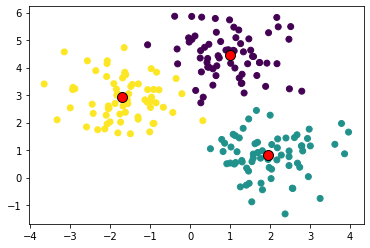

In [18]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.scatter(centers[:,0], centers[:,1], s = 100, c = "r", edgecolor = 'k')  # s : 크기, c : 색깔, edgecolor = 'k' : 까만테두리
plt.show()  

200개 데이터의 군집 번호('kmeans_label')는 아래와 같다.

In [34]:
clusterDF['kmeans_label'].values

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [19]:
clusterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ftr1          200 non-null    float64
 1   ftr2          200 non-null    float64
 2   target        200 non-null    int32  
 3   kmeans_label  200 non-null    int32  
dtypes: float64(2), int32(2)
memory usage: 4.8 KB


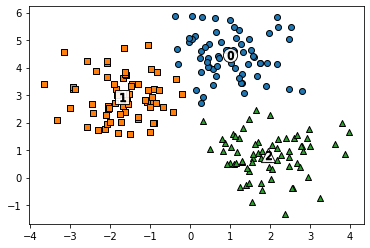

In [35]:
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

for label in unique_labels:  #반복문
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)  #$%d$ : d는 숫자(ex 0,1,2...)

plt.show()

In [36]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


이번에는 군집의 수를 5로 바꿔보자.

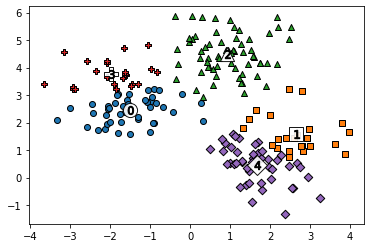

In [37]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

clusterDF['kmeans_label']  = cluster_labels
centers = kmeans.cluster_centers_

unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

- 중간고사 예상 문제 : LogisticRegression(지도학습)에서 `predict()`, PCA(비지도학습)에서 `transform()`, KMeans(비지도학습)에서 `predict()`와 `transform()`의 결과를 비교해서 설명하시오.

## 7.2 군집 평가 

군집은 비지도학습법이므로 그 결과를 평가할 target 데이터가 없다. 군집 결과를 평가하는 방법 가운데 군집간의 거리를 이용하는 **실루엣(silhouette)분석** 에 대해 알아보자. 최적 군집 갯수를 선택할 때에도 실루엣분석을 이용할 수 있다. 실루엣분석의 아이디어는 <u>같은 군집에 속한 데이터끼리의 거리는 짧아야하고 다른 군집에 있는 데이터 사이의 거리는 멀어야한다</u>는 것이다.

**1) 실루엣분석**

교재 420-421의 설명을 잘 읽어보자. 데이터가 n개 있다고 할 때 $i$번째 데이터의 실루엣계수 값은 다음과 같이 계산한다. 그 `데이터에서 자신이 속한 군집에 있는 다른 데이터까지의 평균 거리` **($a(i)$)**를 계산한다. 또 `그 데이터가 속한 군집과 가장 가까운 군집에 있는 데이터까지의 평균 거리` **($b(i)$)**도 계산한 다음 아래와 같이 $i$번째 데이터의 실루엣 계수를 구한다. 
$$ s(i) = \frac {b(i)-a(i)} {\max (a(i), b(i))}. $$

`군집화가 잘 되었다면 실루엣 계수는 1에 가까운 값`이 될 것이며 `군집끼리의 거리가 가까우면 계수값이 0에 가까울 것`이다.\
실루엣 계수가 클수록 좋다.

사이킷런에서는 `sklearn.metrics` 안에 들어있는 함수들을 이용해서 실루엣분석을 할 수 있다. `silhouette_samples()`함수로는 **각 데이터별로 실루엣계수값**을 구할 수 있고`silhouette_score()`함수로는 **실루엣계수의 전체 평균**을 구할 수 있다. `물론 전체 평균값이 1에 가까울수록 군집이 잘 된 것으로 볼 수 있지만 개별 군집의 평균과 전체 균집의 평균이 너무 다르면 곤란하다.`

**2) 붓꽃 데이터셋을 이용한 클러스터 평가**

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names = [name[:-5] for name in iris.feature_names]
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF.head(3)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)  #K=3
kmeans.fit(irisDF)

irisDF['cluster'] = kmeans.labels_
irisDF.head(3)

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [40]:
irisDF.tail()

,sepal length,sepal width,petal length,petal width,cluster
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


In [41]:
display(pd.concat([irisDF.head(), irisDF.tail()]))

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,0


`silhouette_samples()`을 이용하여 150개 데이터 전체의 실루엣계수를 계산하고 `silhouette_score()`를 이용하여 평균도 구해보자. 이 함수들의 괄호 속에는 실루엣계수를 계산한 데이터와 그 데이터의 군집 label이 들어있는 배열을 입력하면 된다.

In [42]:
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
average_score = silhouette_score(iris.data, irisDF['cluster'])

데이터프레임에 실루엣계수가 들어있는 컬럼을 추가하고 평균값을 출력해보자.

In [43]:
irisDF['silhouette_coeff'] = score_samples
irisDF.head(3)

,sepal length,sepal width,petal length,petal width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [44]:
print(average_score)

0.5528190123564091


각 군집별로 실루엣계수의 평균도 구해보자.

In [45]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

세 평균값을 비교해보면 1번 군집의 평균은 높지만 0, 2번 군집의 평균들은 낮다. 

**3) 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법**

아래 코드(교재에는 없다)는 사이킷런 [사용설명서](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)에 실려있는 것으로서 군집별로 실루엣계수를 시각화한 결과를 보여준다. 군집의 수를 여러가지로 바꾸었을 때 나오는 결과를 비교해보고 최적의 군집 수를 찾을 수 있다. 코드의 세부적인 사항보다는 결과로 얻은 그림을 잘 살펴보자. 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


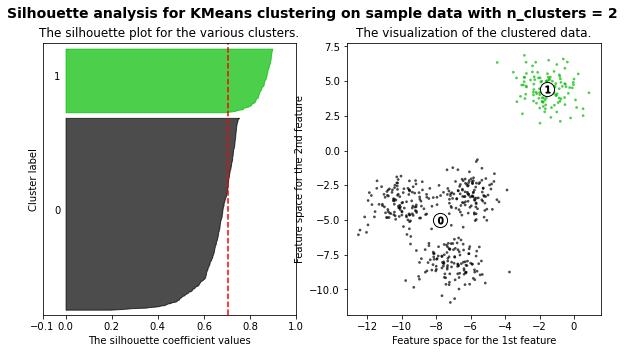

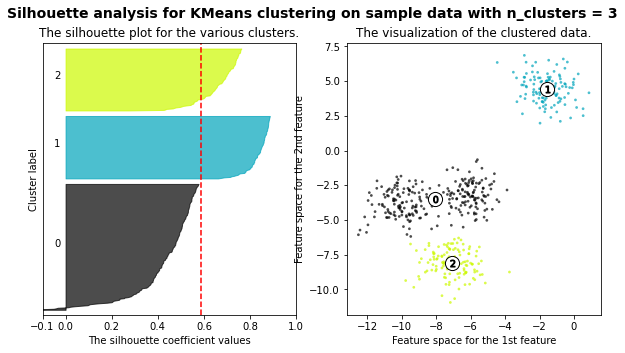

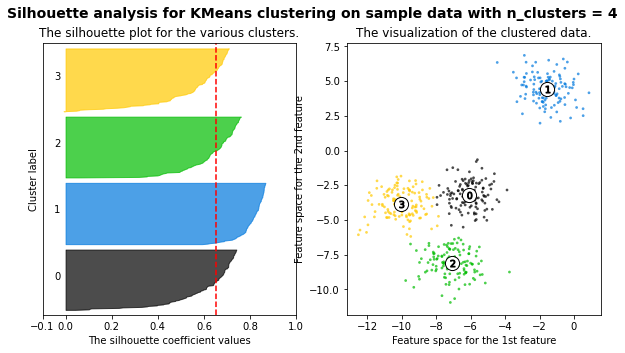

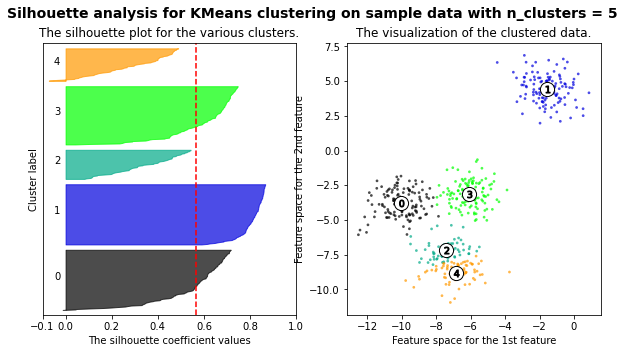

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

x축 : 실루엣 계수값\
y축 : 군집 번호\
빨간선 : 전체 평균

`make_blobs()` 함수를 이용해서 500개 데이터를 만든 다음 군집의 수가 2, 3, 4, 5일 때의 실루엣 계수 그림을 그렸다. 점선으로 표시된 곳은 실루엣계수의 전체 평균값 위치다.

결과를 보고 최적 군집의 수를 선택해보자.

평균 실루엣 계수값은 군집이 2일 때 가장 높다. 하지만 실루엣그림과 데이터 그림을 보면 두 개의 군집이 최적은 아님을 알 수 있다. 군집이 세 개일 때는 0번 군집의 계수값이 너무 낮다. 또한 군집이 다섯개이면 2, 4번 군집에 문제가 있다. 결국 가장 좋은 경우는 군집 수가 네 개일 때다.

붓꽃 데이터에 대해서도 연습해보자.

- visualize_silhouette 함수 정의

In [32]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

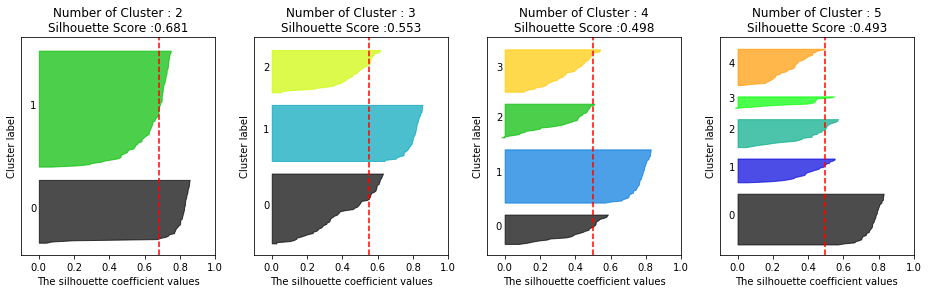

In [33]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data)

군집 내부의 실루엣계수값 분포, 전체 평균과의 비교 등을 고려할 때 군집의 수 2, 3, 4, 5 가운데 어떤 값이 가장 적절해 보이는가? : 2개 (p. 426)

* 실루엣 분석의 문제점 : 데이터가 많아지면 계산 시간이 매우 오래 걸린다.

## 7.3 평균이동 (Mean Shift)

**1) Mean Shift 개요**

평균이동방법은 **k-means와 마찬가지로 중심점을 계속 이동시켜서 군집을 만드는 방법이다.** 하지만 k-means와 `다른 점`은 **데이터의 평균값이 아니라 데이터들의 밀도를 이용** 한다는 것이다. 즉 데이터들로부터 확률밀도함수를 추정하고 그 함수의 봉우리가 있는 곳으로 중심점을 이동한다. 이때 밀도함수를 추정하기 위해 다음과 같은 <u>커널밀도추정(kernel density estimation, KDE)</u>방법을 이용한다.

$$ {\rm KDE} = \frac {1}{n} \sum_{i=1}^n K_h (x - x_i ) =  \frac {1}{nh} \sum_{i=1}^n K \left( \frac {x - x_i }{h} \right). $$

이 식에서 $h$는 'bandwidth'라고 부르는데 429쪽의 그림에서 보듯 그 값이 커질수록 smooth한 밀도함수를 얻게 된다. 즉 $h$가 `너무 크면 과소(under-fitting)적합이 생길 수 있고 너무 작으면 사소한 변화에도 민감하게 반응하는 과대적합(over-fitting)`이 생길 수 있다. 

**2) 사이킷런 평균 이동 군집화**

`sklearn.cluster`에서 `MeanShift`를 불러와서 bandwidth값을 지정하고 `fit(), predict()` 절차를 따르면 된다. 

[sklearn.cluster.MeanShift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift.fit)

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

In [4]:
X[:5]

array([[-1.67173659,  3.5340075 ],
       [ 0.73273157,  4.41323161],
       [ 1.08473328,  4.56850109],
       [-1.45849654,  3.32594984],
       [ 1.1850368 ,  5.23225746],
       [-0.98562693,  2.08916581],
       [ 2.42001293,  0.49461208],
       [ 1.70664481,  2.2483361 ],
       [ 1.06510854,  4.58517988],
       [-1.66036146,  2.6414876 ],
       [ 0.69404622,  5.15949888],
       [-1.04126281,  2.80618085],
       [ 1.50899649,  4.38895984],
       [ 1.25347478,  3.53864427],
       [ 0.34116122,  4.3401491 ],
       [-1.12980082,  2.76200969],
       [ 2.60569709,  0.57117029],
       [ 2.15463474,  0.67413377],
       [ 0.40706768,  3.09538951],
       [-2.94838314,  4.36302726],
       [-1.12193896,  3.16264038],
       [ 1.53393915,  0.31915668],
       [ 1.00830104,  4.17275863],
       [ 1.63934646,  4.19528026],
       [-3.10579897,  2.20212747],
       [-0.15345841,  4.15486913],
       [ 1.60473464, -0.65871855],
       [-2.06180476,  1.91142823],
       [-0.92635727,

- 퀴즈 : X의 shape은?\
: (200, 2)

In [35]:
np.bincount(y)

array([67, 67, 66])

In [36]:
meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5])

- 퀴즈 : cluster_labels의 길이는?

In [37]:
len(cluster_labels)

200

- 군집마다 다른 색깔로 산점도 그림을 그리시오

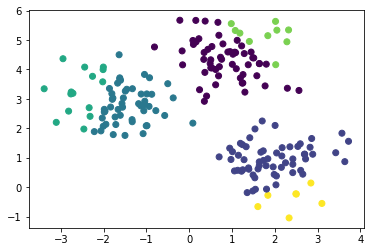

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0], X[:,1], c = cluster_labels)
plt.show()

6개 군집이 만들어졌다.(과대적합) 너무 많아보인다면 군집 수를 줄이기 위해 bandwidth 값을 높여보자.

In [10]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

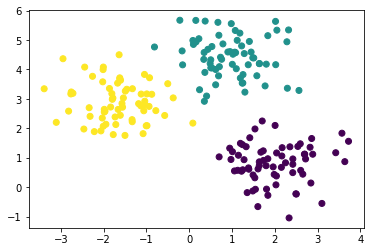

In [11]:
plt.scatter(X[:,0], X[:,1], c = cluster_labels)
plt.show()

- 퀴즈 : cluster_std의 값을 0.3으로 바꾸면 그림이 어떻게 달라질까?

In [16]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.3, random_state=0)
meanshift= MeanShift(bandwidth=0.8)

cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

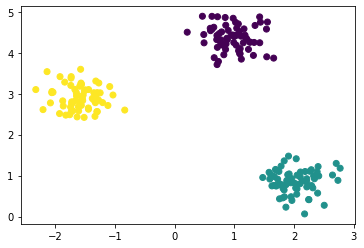

In [17]:
plt.scatter(X[:,0], X[:,1], c = cluster_labels)
plt.show()

- 퀴즈 : 퀴즈 : cluster_std의 값을 1.0으로 바꾸면 군집의 수가 어떻게 달라질까?

In [18]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=1.0, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

그림을 확인해보자. 만족스러운가?

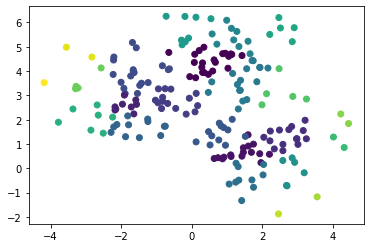

In [19]:
plt.scatter(X[:,0], X[:,1], c = cluster_labels)
plt.show()

좋은 군집이 아니다.

In [21]:
meanshift= MeanShift(bandwidth=0.6)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [22]:
meanshift= MeanShift(bandwidth=1.5)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

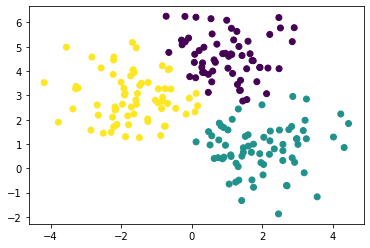

In [23]:
plt.scatter(X[:,0], X[:,1], c = cluster_labels)
plt.show()

`bandwidth을 늘려야 군집의 수가 적어진다.`

이처럼 MeanShift에서는 bandwidth 선택이 중요하므로 사이킷런에서는 그 값을 추정하기 위한 함수 ` estimate_bandwidth`를 제공하고 있다.

In [24]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

In [25]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
round(bandwidth,3)

1.816

추정한 bandwidth 값으로 군집화해보자.

In [26]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
np.unique(cluster_labels)

array([0, 1, 2], dtype=int64)

시각화해서 결과를 보자.

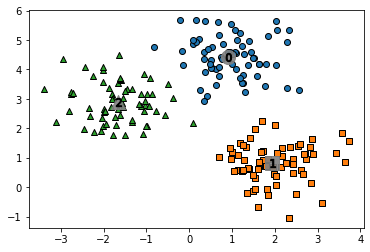

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()


실제 target 값과 군집화 결과를 비교해보자.

In [28]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


군집이 잘 되었다.

- Kmeans와 달리 MeanShift에는 transform()이 없다. 이유는?\
: 거리 기반 방법이 아니므로.

평균 이동의 **장점**은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것입니다. 또한 이상치의 영향력도 크지 않으며, 미리 군집의 개수를 정할 필요도 없습니다.

**하지만** 알고리즘 수행 시간이 오래 걸리고 무엇보다도 band-width의 크기에 따른 군집화 영향도가 매우 큽니다.

## 7.4 GMM(Gaussian Mixture Model, 가우시안 혼합 모델)

**1) 가우시안 혼합 모델**

이 방법은 여러 개의 정규분포에서 나온 데이터가 혼합되어있다고 보고 개별 정규분포를 찾아서 군집을 만든다. (**혼합(mixture)** 에 대한 교재의 설명(pp. 434-5)을 잘 보라.) 

사이킷런에서는 `sklearn.mixture`에 들어있는 `GaussianMixture` 클래스를 이용하면 되는데 내부적으로는 `EM(Expectation Maximization)`이라는 알고리즘이 적용된다.

**2) 붓꽃 데이터 분석**

붓꽃 데이터를 가지고 가우시안혼한 모델과 k-means 방법을 비교해보자. k-means와 마찬가지로 `GaussianMixture()`의 괄호 속에는 집단의 수를 입력하며 `fit(), predict()` 절차에 따라 군집을 만든다.

In [52]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [53]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [54]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- 퀴즈 : iris_DF의 컬럼 수는?\
: 6개

In [55]:
irisDF.shape

(150, 6)

In [56]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


위의 두 결과를 비교해보자. 붓꽃 데이터는 k-means보다 GMM으로 군집화하는 편이 더 나아보인다.

- 퀴즈 : 붓꽃 데이터를 MeanShift방법으로(best bandwidth를 찾아서 이용) 군집화 해보시오.

In [57]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [58]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(iris.data)
round(bandwidth,3)

1.202

In [59]:
best_bandwidth = estimate_bandwidth(iris.data)
meanshift= MeanShift(bandwidth=best_bandwidth)

ms_labels = meanshift.fit_predict(iris.data)
np.unique(ms_labels)

array([0, 1], dtype=int64)

In [60]:
irisDF['ms_cluster'] = ms_labels
iris_result = irisDF.groupby(['target'])['ms_cluster'].value_counts()
print(iris_result)

target  ms_cluster
0       1             50
1       0             49
        1              1
2       0             50
Name: ms_cluster, dtype: int64


**3) GMM과 k-means 비교**

교재 438쪽 위의 그림처럼 `데이터가 원형으로 모여있을 경우에는 거리에 기반을 둔 k-means가 군집화를 잘 한다`. 만일 439쪽 그림처럼 원이 아닌 긴 `타원 모양으로 모여있다면 어떨까? : GMM이 더 잘 한다`

교재의 그림을 그리려면 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 아래 함수를 정의하면 된다. 이 함수는 교재 438쪽의 설명과 같은 인자를 필요로 한다.

In [20]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

아래에서는 `make_blobs()` 함수를 이용하여 300개의 데이터를 만든 다음 회전시켜서 타원 모양으로 만든다.

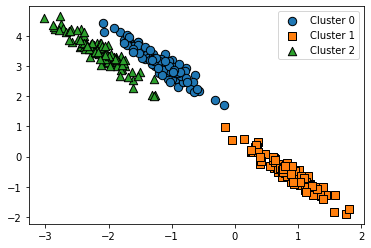

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)
 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

아래에서는 위의 내용을 자세히 make_blobs() 함수를 이용하여 300개의 데이터를 만든 다음 회전시켜서 타원 모양으로 만든다.

In [33]:
from sklearn.datasets import make_blobs

X, y  =  make_blobs(n_samples = 300, n_features = 2, centers = 3, 
                    cluster_std = 0.5, random_state = 0)

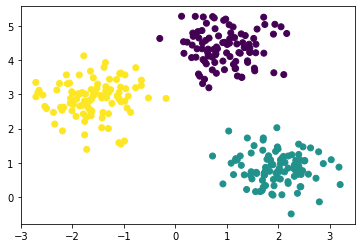

In [34]:
plt.scatter(X[:,0], X[:,1], c=y)

In [41]:
transformation  =  [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]  #길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
X_aniso  =  np.dot(X, transformation)

In [37]:
X[:3]

array([[0.51985897, 4.86229547],
       [1.69246883, 0.20598168],
       [1.35678894, 4.36462484]])

In [38]:
xtr = X[:3].dot(transformation)
xtr

array([[-1.6718278 ,  3.81428351],
       [ 0.94538457, -0.90194387],
       [-0.95919906,  2.85715216]])

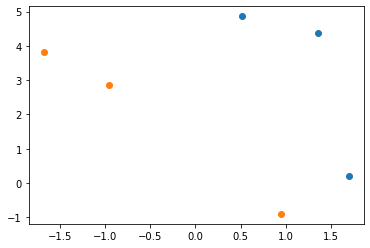

In [39]:
plt.scatter(X[:3, 0], X[:3, 1])
plt.scatter(xtr[:, 0], xtr[:,1])

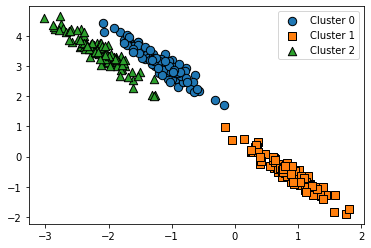

In [40]:
clusterDF  =  pd.DataFrame(data = X_aniso, columns = ['ftr1', 'ftr2'])
clusterDF['target']  =  y

visualize_cluster_plot(None, clusterDF, 'target', iscenter = False)

* k-means 군집화 결과

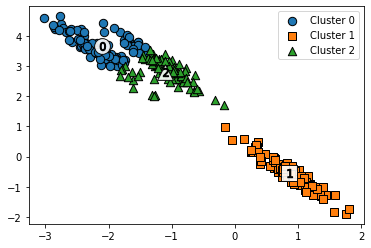

In [68]:
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

* GMM 군집화 결과

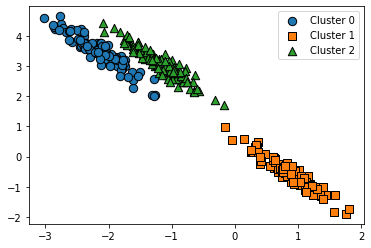

In [69]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

`타원형 데이터 군집화의 경우k-means보다 GMM이 월등하게 낫다.` 실제값과 비교해보자.

In [70]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 **장점**이 있습니다.

**하지만** 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있습니다.

## 7.5 DBSCAN (density based spatial clustering of applications with noise)

**1) DBSCAN**

두 집단으로 이루어진 데이터가 442쪽의 그림과 같다고 하자. 지금까지 공부한 방법들로 군집화할 수 있을까? 어렵다. 이럴 때 DBSCAN 방법을 이용하면 된다. 아이디어는 교재 442-445쪽의 설명을 보자.

**2) 붓꽃 데이터 군집화**

In [27]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

eps(입실론 주변 영역)를 0.6, min_samples(최소 데이터 개수)를 8개로 두고 군집화해보자.  

입실론 주변 영역안에 최소 데이터 개수가 있어야 핵심 샘플(코어), 코어 반경안에 있으면 이웃 샘플, 어디에도 안묶이는 것들은 outlier

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [29]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

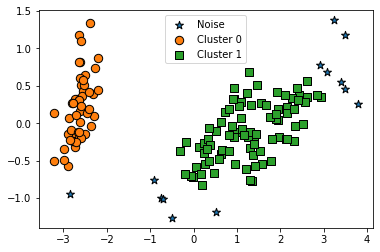

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

위의 결과는 eps=0.6, min_samples=8

Noise는 어디에도 속하지 못하는 집단이다.(outlier)

eps, min_samples 값을 바꾸면 어떤 변화가 생기는지 살펴보자.

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


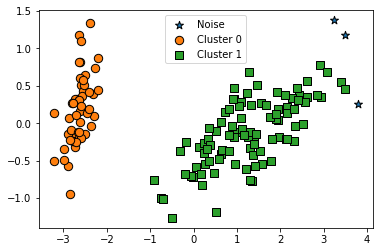

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

위의 결과는 eps=0.8, min_samples=8

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


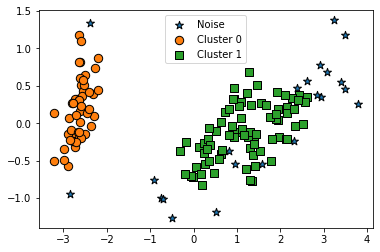

In [32]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

위의 결과는 eps=0.6, min_samples=16

따라서, 위의 결과는 `eps을 증가시키면 노이즈 데이터 수가 줄어든다. min_samples을 증가시키면 노이즈 데이터 수가 증가한다.`

**3) DBSCAN 적용하기 – make_circles() 데이터 세트**

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)
